# Pizza Time

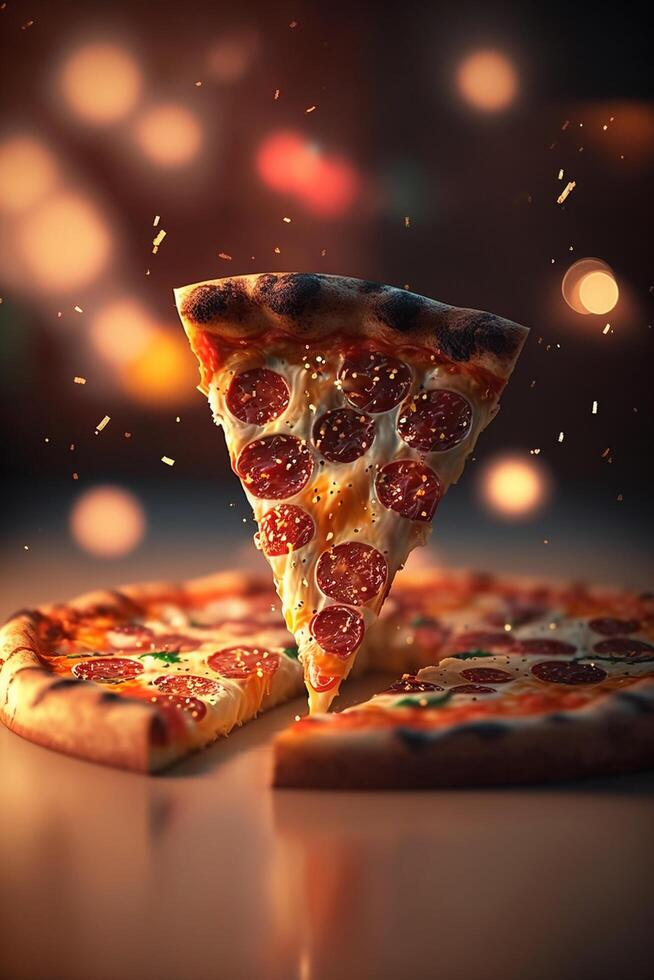

W dużym skrócie masz dataset danych zamówień i musisz ocenić jaka firma  wykonywała to zamówienie.
Żeby to zrobić musisz zmienijszyć wymiarowość zamówienia do 5 (pięć parametrów na jedno zamówienie), odpowiednio dobrać parametry xgboosta, który zostanie wytrenowany na zmniejszonych danych i wsm tyle.
Podsumowując:
 - dostajesz dataset danych tabelarycznych w pandas.DataFrame (zbiory treningowy i walidacyjny z etykietami do obydwu)
 - musisz opracować strategię zmniejszania wymiarowości rekordów do 5
 - musisz dobrać odpowiednie parametry algorytmu xgboost
 - punkty dostajesz maksimum (100pkt) za accuracy >= 0.87, a minimum (0pkt) za accuracy <= 0.72 - pomiędzy tymi wartościami wynik rośnie liniowo
 - nie wolno ci korzystać z dodatkowych danych
 - twoje rozwiązanie musi mykonywać się nie więcej niż 1 min w środowisku **bez dostępnego GPU** oraz bez dostępu do Internetu

## Importy

In [ ]:
import gdown
import pandas as pd
from sklearn.metrics import accuracy_score
import os
from xgboost import DMatrix, train, XGBClassifier

In [123]:
# https://drive.google.com/drive/folders/13sh3S2uCWgKKHXEJ5Sv31DzLgGlVe5DR?usp=sharing

gdown.download_folder('https://drive.google.com/drive/folders/1Gde_HOx6P4RWXpeeLc-l-7OV60HMFimL?usp=sharing', quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 11J9DCR6OhanQjWeZDsE7KjY3dhxwwwQU X_train.csv
Processing file 1G4t7uDucQ0FTvlBq8H76eNw_GAapfNkk X_valid.csv
Processing file 1l1ODsWsMCa_870hVVKjcH9WBUWdlG3H7 y_train.csv
Processing file 1l0ZYOJaARIZogf-QWBPXPNOzNO63NP78 y_valid.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=11J9DCR6OhanQjWeZDsE7KjY3dhxwwwQU
To: /content/pizza_time_data/X_train.csv
100%|██████████| 79.2k/79.2k [00:00<00:00, 57.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1G4t7uDucQ0FTvlBq8H76eNw_GAapfNkk
To: /content/pizza_time_data/X_valid.csv
100%|██████████| 10.3k/10.3k [00:00<00:00, 16.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1l1ODsWsMCa_870hVVKjcH9WBUWdlG3H7
To: /content/pizza_time_data/y_train.csv
100%|██████████| 1.62k/1.62k [00:00<00:00, 3.40MB/s]
Downloading...
From: https://drive.google.com/uc?id=1l0ZYOJaARIZogf-QWBPXPNOzNO63NP78
To: /content/pizza_time_data/y_valid.csv
100%|██████████| 218/218 [00:00<00:00, 341kB/s]
Download completed


['/content/pizza_time_data/X_train.csv',
 '/content/pizza_time_data/X_valid.csv',
 '/content/pizza_time_data/y_train.csv',
 '/content/pizza_time_data/y_valid.csv']

## Dane

In [124]:
def load_split_datasets(dir_path):
    X_train = pd.read_csv(os.path.join(dir_path, "X_train.csv"))
    X_valid = pd.read_csv(os.path.join(dir_path, "X_valid.csv"))
    y_train = pd.read_csv(os.path.join(dir_path, "y_train.csv")).squeeze()
    y_valid = pd.read_csv(os.path.join(dir_path, "y_valid.csv")).squeeze()
    return X_train, X_valid, y_train, y_valid,

In [125]:
data_dir = "./pizza_time_data"

X_train, X_valid, y_train, y_valid = load_split_datasets(data_dir)

## Twoje zadanie

Tutaj musisz zaimplementować funkcję ```engineer_features```, która przyjmuje pandas.DataFrame postaci (num_samples, num_features), a zwraca pandas.DataFrame postaci (num_samples, 5)

Dodatkowo, poniżej w słowniku musisz zdefiniować parametry modelu xgboost, który zostanie wytrenowany na pomniejszonych przez twoją funkcję danych i na takich danych też zostanie zwalidowany.

In [126]:
def engineer_features(df):
    return df[["toppings_count"]]

In [127]:
xgb_params = {
    'eval_metric': "mlogloss",
    "objective": "multi:softmax",
    "num_class": 10
}

## Ewaluacja

In [128]:
def eval_solution(engineer_features_fn, params):

    new_X_train = engineer_features(X_train)
    new_X_val = engineer_features(X_valid)

    assert new_X_train.shape[1] <= 5
    assert new_X_val.shape[1] <= 5

    dtrain = DMatrix(new_X_train, label=y_train, enable_categorical=True)
    dvalid = DMatrix(new_X_val, label=y_valid, enable_categorical=True)

    new_params = params.copy()
    num_boost_rounds = new_params.pop("num_boost_round", 1)

    model = train(new_params, dtrain, num_boost_round=num_boost_rounds)
    preds = model.predict(dvalid)
    if len(preds.shape) < 2:
        preds = preds.reshape(-1, 1)
    preds_class = preds.argmax(axis=1)

    acc = accuracy_score(y_valid, preds_class)

    print("XGBoost Accuracy:", acc)
    print("What gives you a SCORE of: ", max(min(acc-0.72, 0.15), 0) * 2000 / 3)

    return acc

In [129]:
eval_solution(engineer_features, xgb_params)

XGBoost Accuracy: 0.2079207920792079
What gives you a SCORE of:  0.0


0.2079207920792079